## Import libraries config and modules

In [2]:
import os
import sys
import pandas as pd
from urllib.parse import urljoin
import configparser
import warnings
warnings.filterwarnings('ignore')

In [3]:
sys.path.append('../src')
sys.path.append('../config')

In [4]:
from analysis.analysis_module import load_data_and_merge, subset_religion_gdf, plot_nomis_data

Switched to: TkAgg


In [5]:
%matplotlib inline

In [6]:
# Load configuration
config = configparser.ConfigParser()
config.read('../config/config.ini')

['../config/config.ini']

In [8]:
# Access configuration values
public_repo = config['directories']['public_repo']
opendata_shapefile_districts = config['shapefiles']['districts']
opendata_shapefile_districts_url = urljoin(public_repo, opendata_shapefile)
nomis_csv_url = urljoin(public_repo, 'nomis_religion.csv')

## Import data 

In [9]:
merged_gdf = load_data_and_merge(nomis_csv_url, opendata_shapefile_districts_url, nomis_key="GEOGRAPHY_CODE", geo_key='lad18cd' )

In [10]:
merged_gdf.head()

,lad18cd,objectid,lad18nm,lad18nmw,st_areasha,country,country_cod,county,county_code,geometry,DATE,GEOGRAPHY_NAME,RURAL_URBAN_NAME,C_RELPUK11_NAME,MEASURES_NAME,OBS_VALUE
0,E06000001,1.0,Hartlepool,None,9.392448e+07,England,e92000001,Hartlepool,e06000001,"MULTIPOLYGON (((-1.27024 54.72716, -1.26821 54...",2011.0,Hartlepool,Total,Christian,Percent,69.9
1,E06000001,1.0,Hartlepool,None,9.392448e+07,England,e92000001,Hartlepool,e06000001,"MULTIPOLYGON (((-1.27024 54.72716, -1.26821 54...",2011.0,Hartlepool,Total,Buddhist,Percent,0.2
2,E06000001,1.0,Hartlepool,None,9.392448e+07,England,e92000001,Hartlepool,e06000001,"MULTIPOLYGON (((-1.27024 54.72716, -1.26821 54...",2011.0,Hartlepool,Total,Hindu,Percent,0.2
3,E06000001,1.0,Hartlepool,None,9.392448e+07,England,e92000001,Hartlepool,e06000001,"MULTIPOLYGON (((-1.27024 54.72716, -1.26821 54...",2011.0,Hartlepool,Total,Jewish,Percent,0.0
4,E06000001,1.0,Hartlepool,None,9.392448e+07,England,e92000001,Hartlepool,e06000001,"MULTIPOLYGON (((-1.27024 54.72716, -1.26821 54...",2011.0,Hartlepool,Total,Muslim,Percent,0.7


## Visualisation tests

### for Christian

In [11]:
subset_df = subset_religion_gdf(merged_gdf,'Christian')

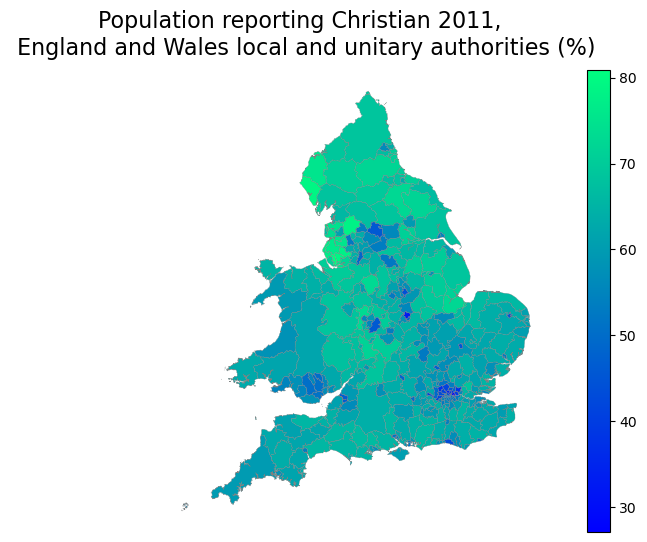

<module 'matplotlib.pyplot' from 'c:\\Users\\Home\\anaconda3\\envs\\data-visualisation-GOV-UK\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
plot_nomis_data(
            geo_data=subset_df,
            cmap="winter",
            title="Population reporting Christian 2011, \n England and Wales local and unitary authorities (%)"
)

In [15]:
# Sub-select specific counties
counties = ['Northamptonshire', 'Central Bedfordshire', 'Milton Keynes', 'Bedford', 'Leicestershire', 'Leicester','Rutland', 'Peterborough', 'Cambridgeshire', 'Oxfordshire', 'Buckinghamshire', 'Warwickshire']

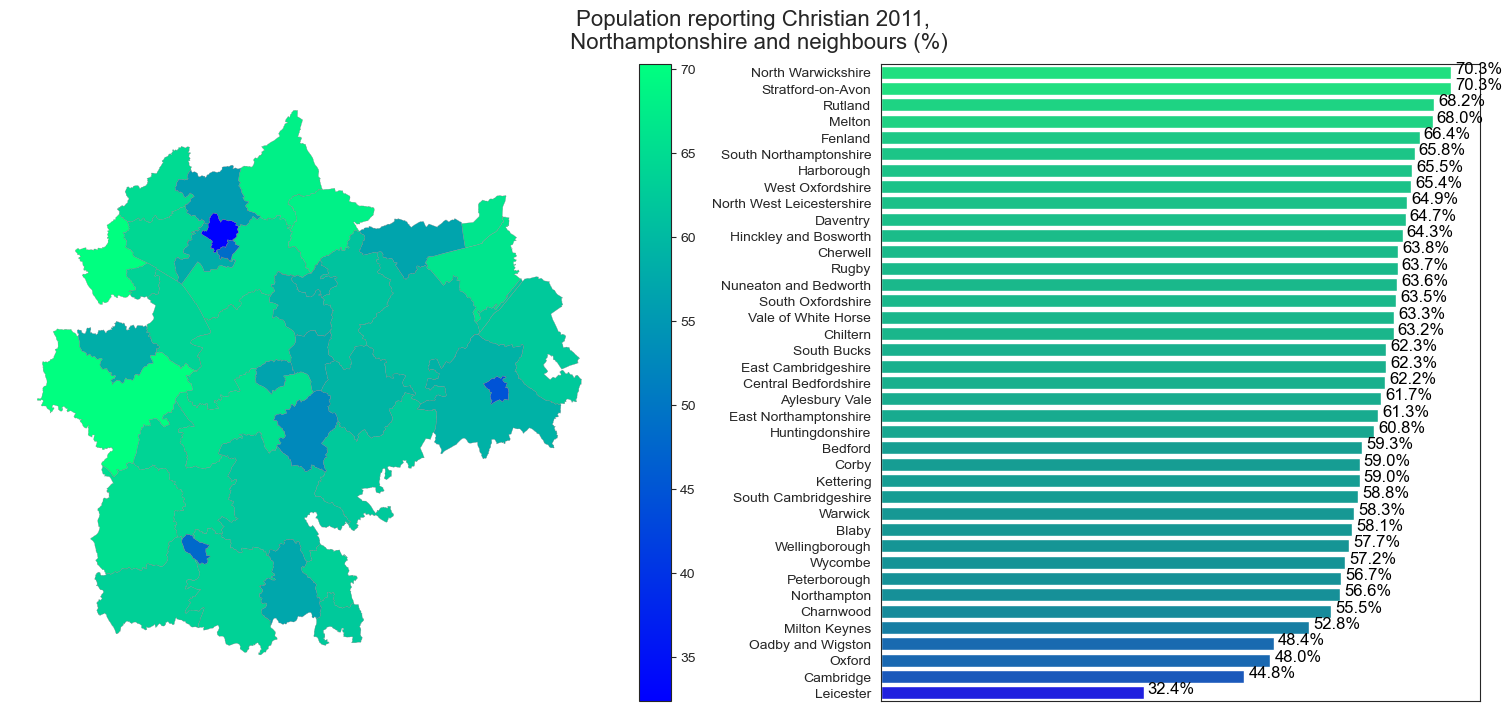

<module 'matplotlib.pyplot' from 'c:\\Users\\Home\\anaconda3\\envs\\data-visualisation-GOV-UK\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
plot_nomis_data(
            geo_data=subset_df[subset_df['county'].isin(counties)],
            cmap="winter",
            title="Population reporting Christian 2011, \n Northamptonshire and neighbours (%)",
            barchart="On"
)

### for Muslimns

In [17]:
subset_df = subset_religion_gdf(merged_gdf,'Muslim')

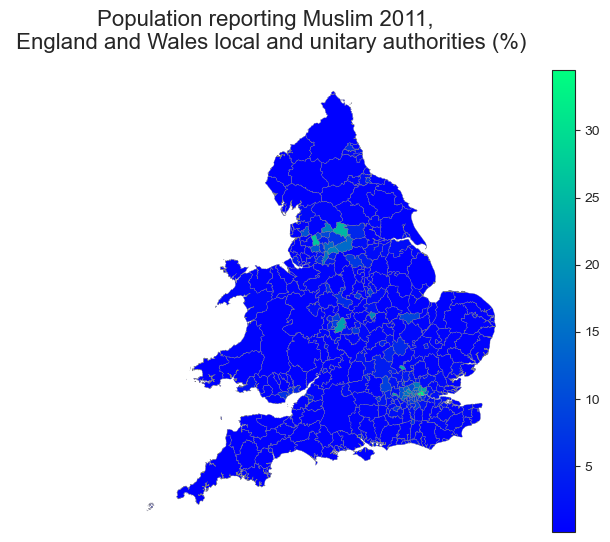

<module 'matplotlib.pyplot' from 'c:\\Users\\Home\\anaconda3\\envs\\data-visualisation-GOV-UK\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [18]:
plot_nomis_data(
            geo_data=subset_df,
            cmap="winter",
            title="Population reporting Muslim 2011, \n England and Wales local and unitary authorities (%)"
)

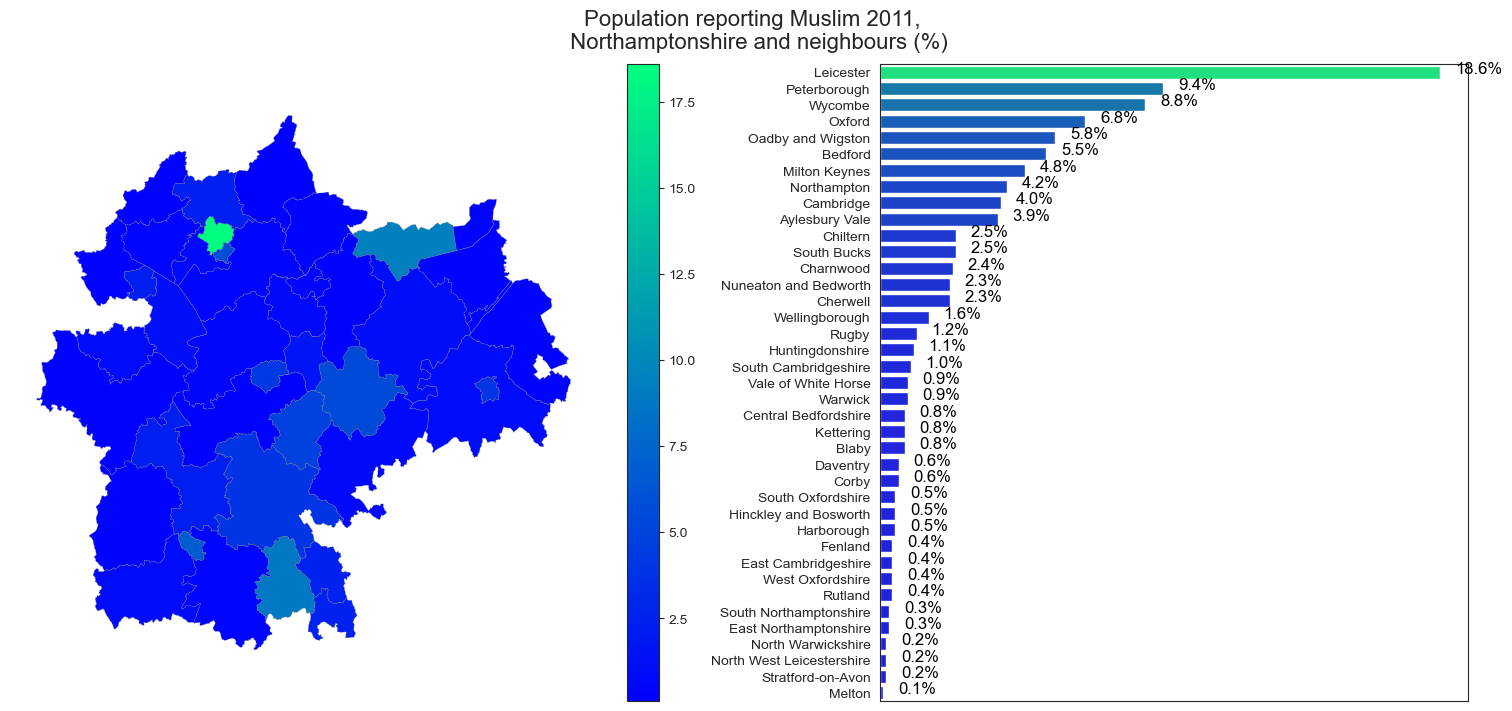

<module 'matplotlib.pyplot' from 'c:\\Users\\Home\\anaconda3\\envs\\data-visualisation-GOV-UK\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [19]:
plot_nomis_data(
            geo_data=subset_df[subset_df['county'].isin(counties)],
            cmap="winter",
            title="Population reporting Muslim 2011, \n Northamptonshire and neighbours (%)",
            barchart="On"
)

### for Hindu

In [20]:
subset_df = subset_religion_gdf(merged_gdf,'Hindu')

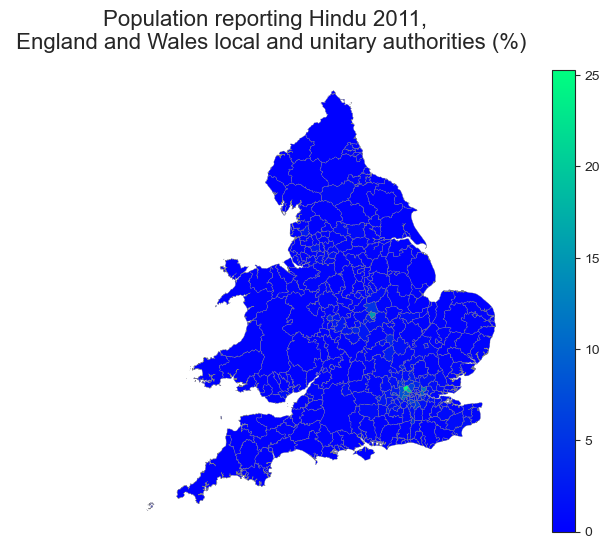

<module 'matplotlib.pyplot' from 'c:\\Users\\Home\\anaconda3\\envs\\data-visualisation-GOV-UK\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [21]:
plot_nomis_data(
            geo_data=subset_df,
            cmap="winter",
            title="Population reporting Hindu 2011, \n England and Wales local and unitary authorities (%)"
)

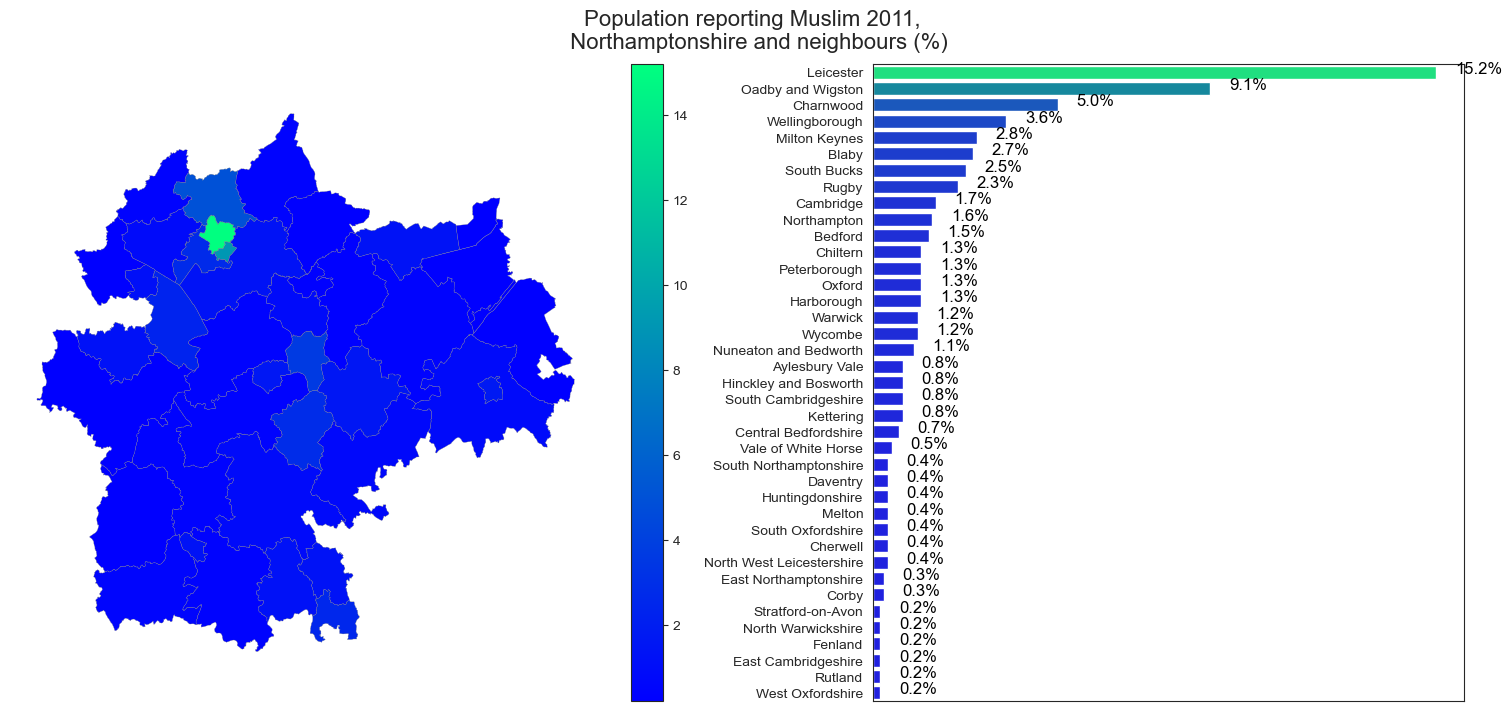

<module 'matplotlib.pyplot' from 'c:\\Users\\Home\\anaconda3\\envs\\data-visualisation-GOV-UK\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [22]:
plot_nomis_data(
            geo_data=subset_df[subset_df['county'].isin(counties)],
            cmap="winter",
            title="Population reporting Muslim 2011, \n Northamptonshire and neighbours (%)",
            barchart="On"
)

# London

In [23]:
# Generate a list for codes from e09000002 to e09000033
start_code = 2
end_code = 33
county_london = ['e090000{:02d}'.format(code) for code in range(start_code, end_code + 1)]

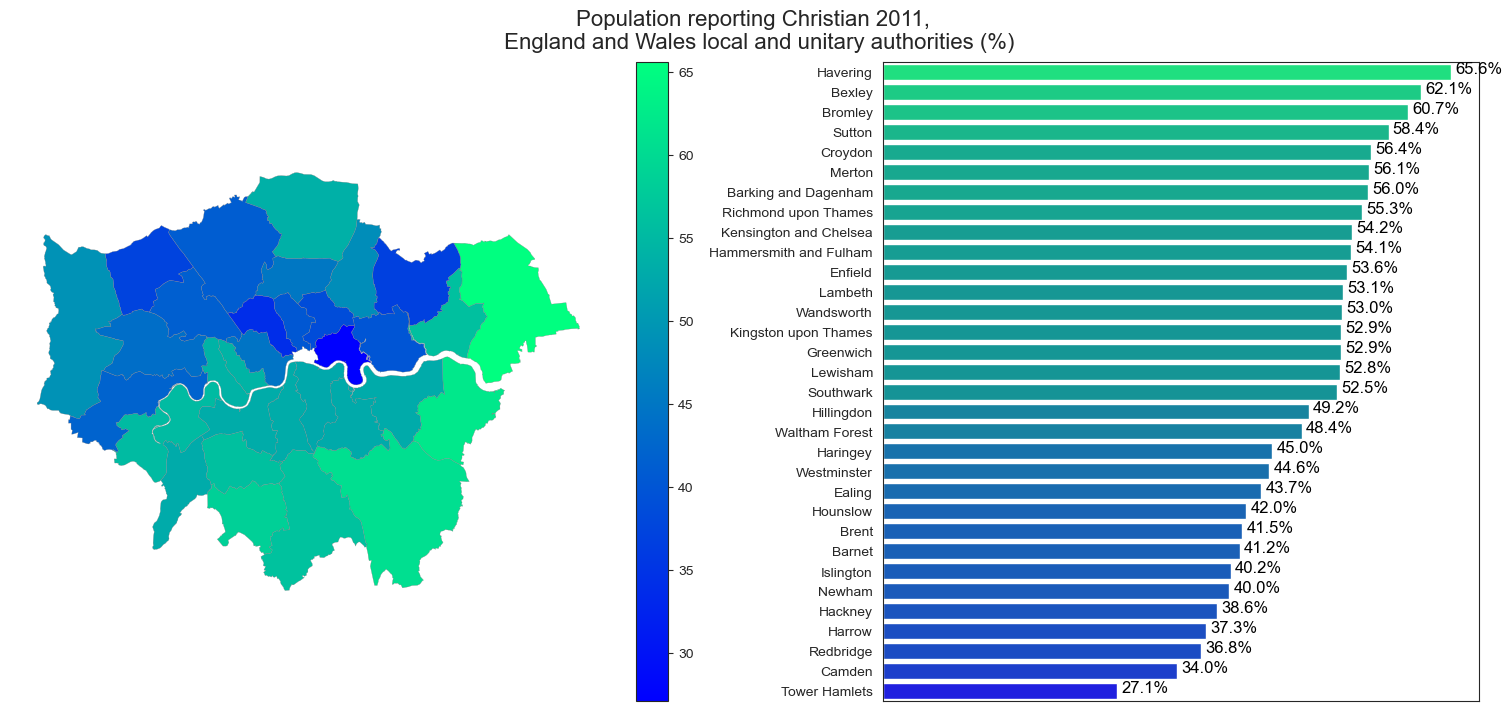

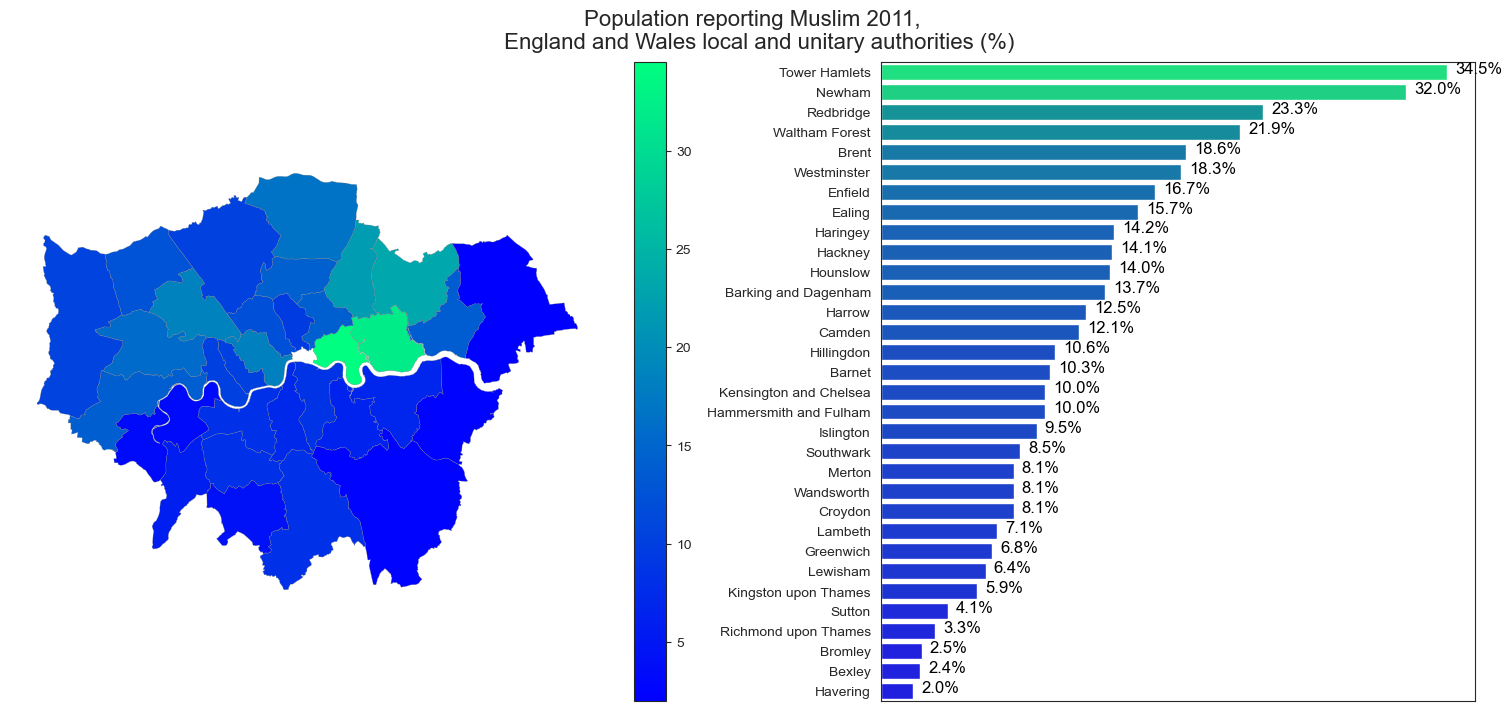

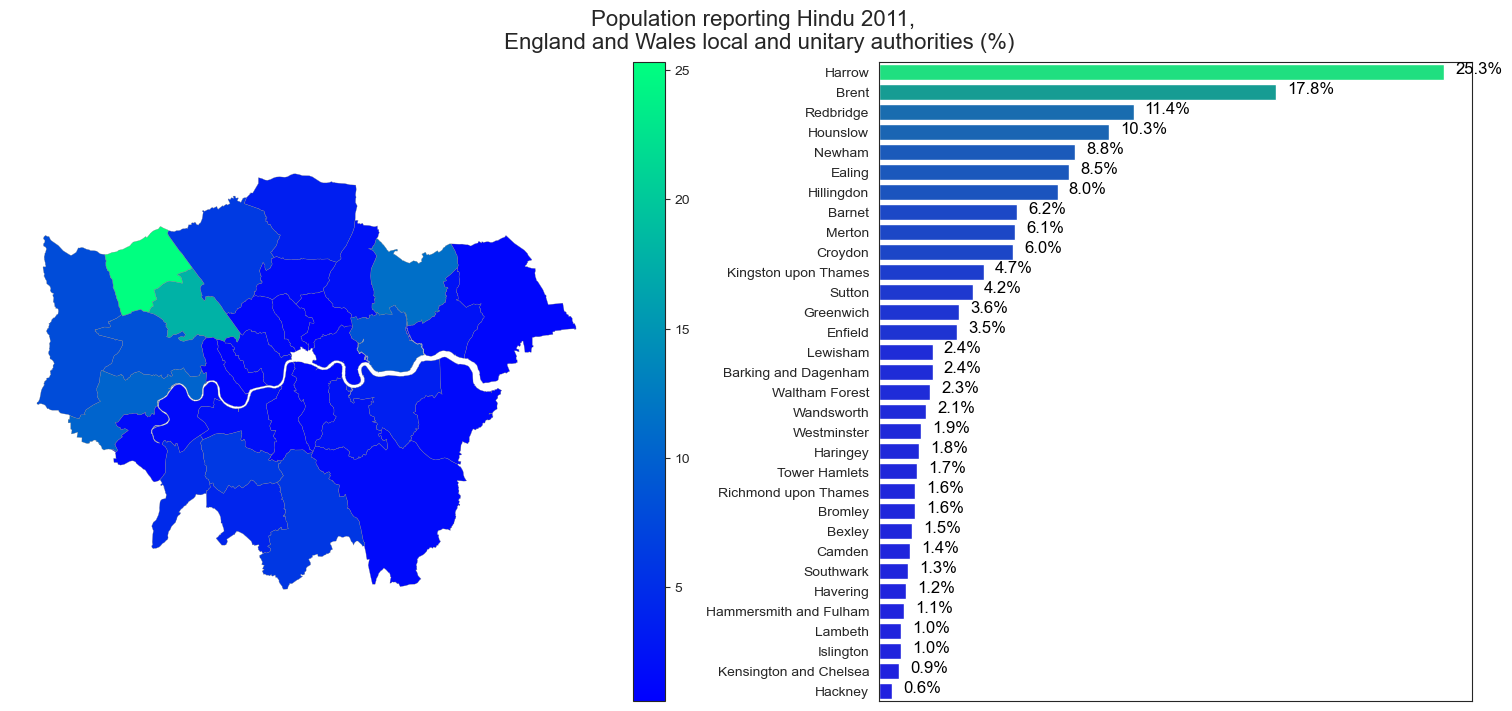

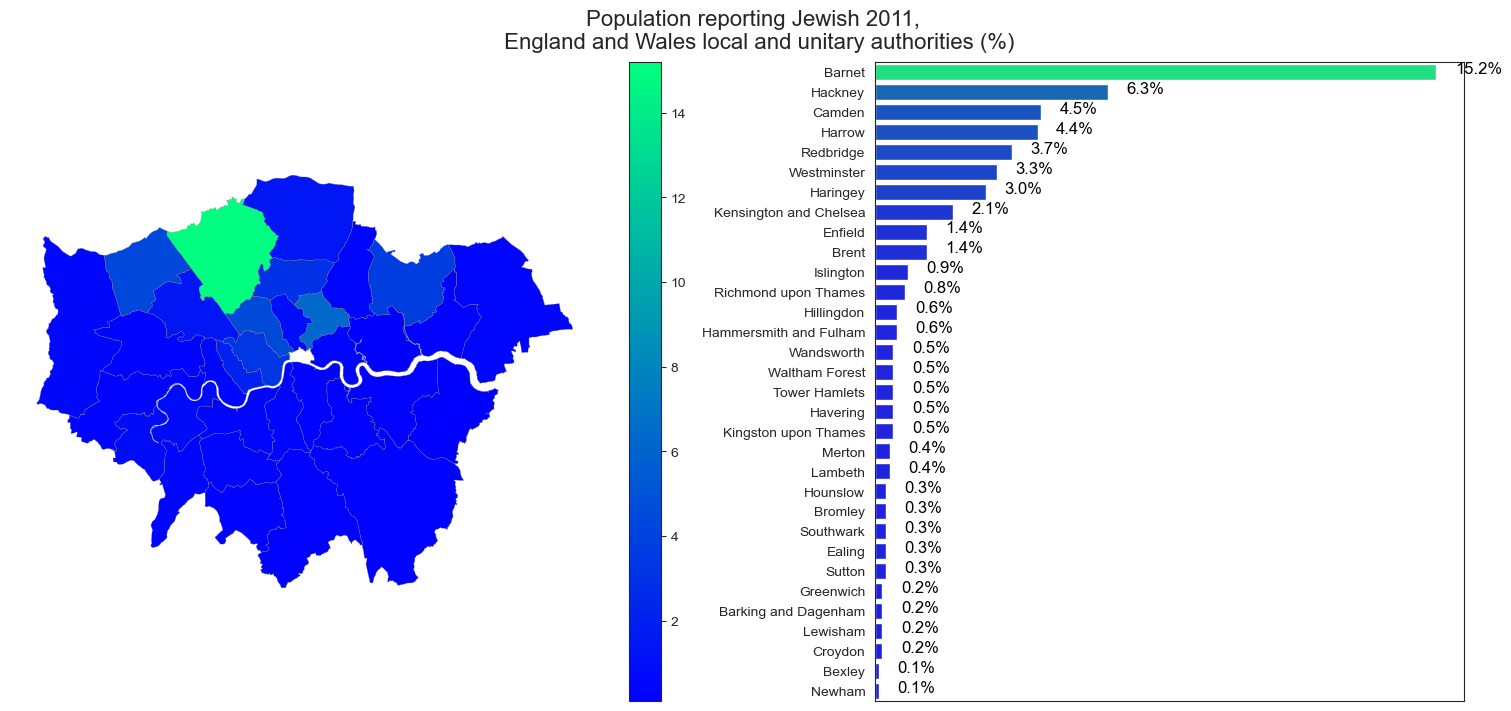

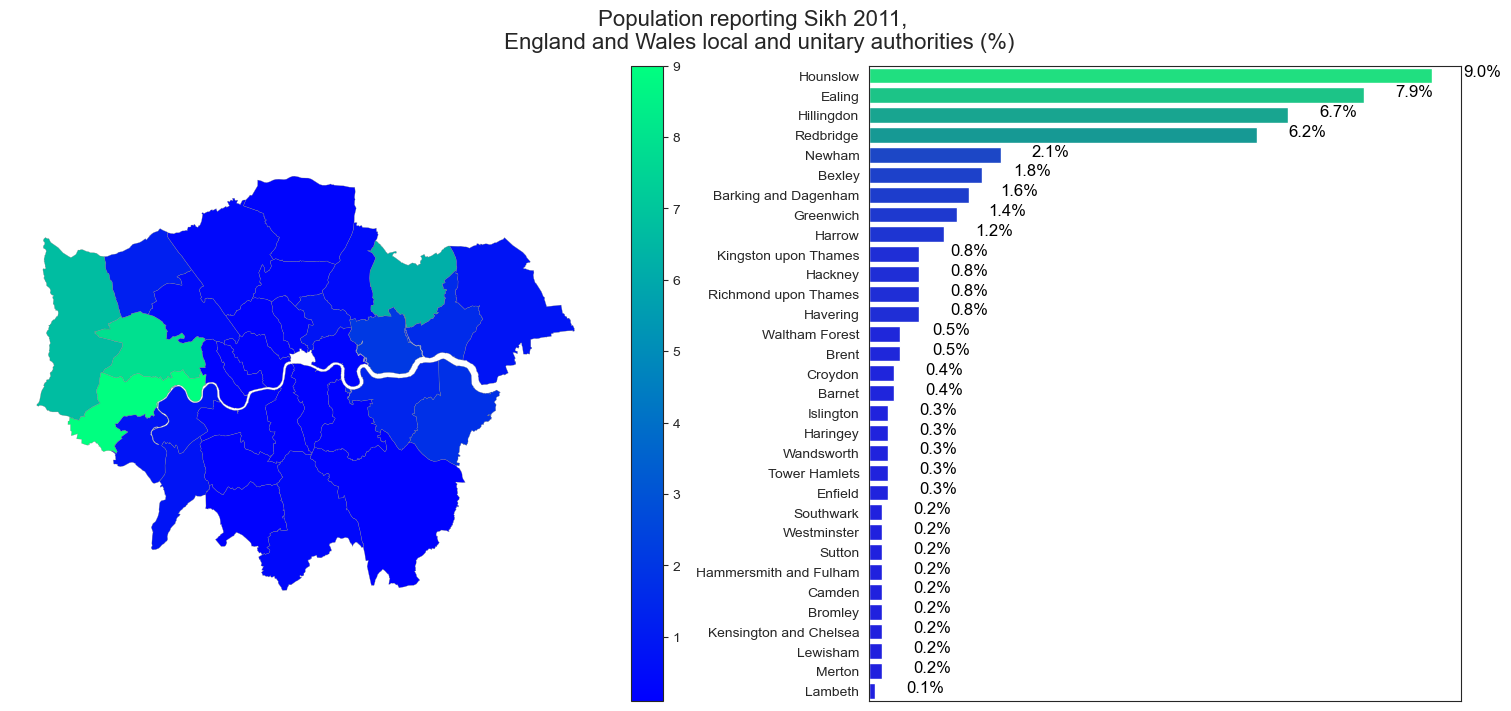

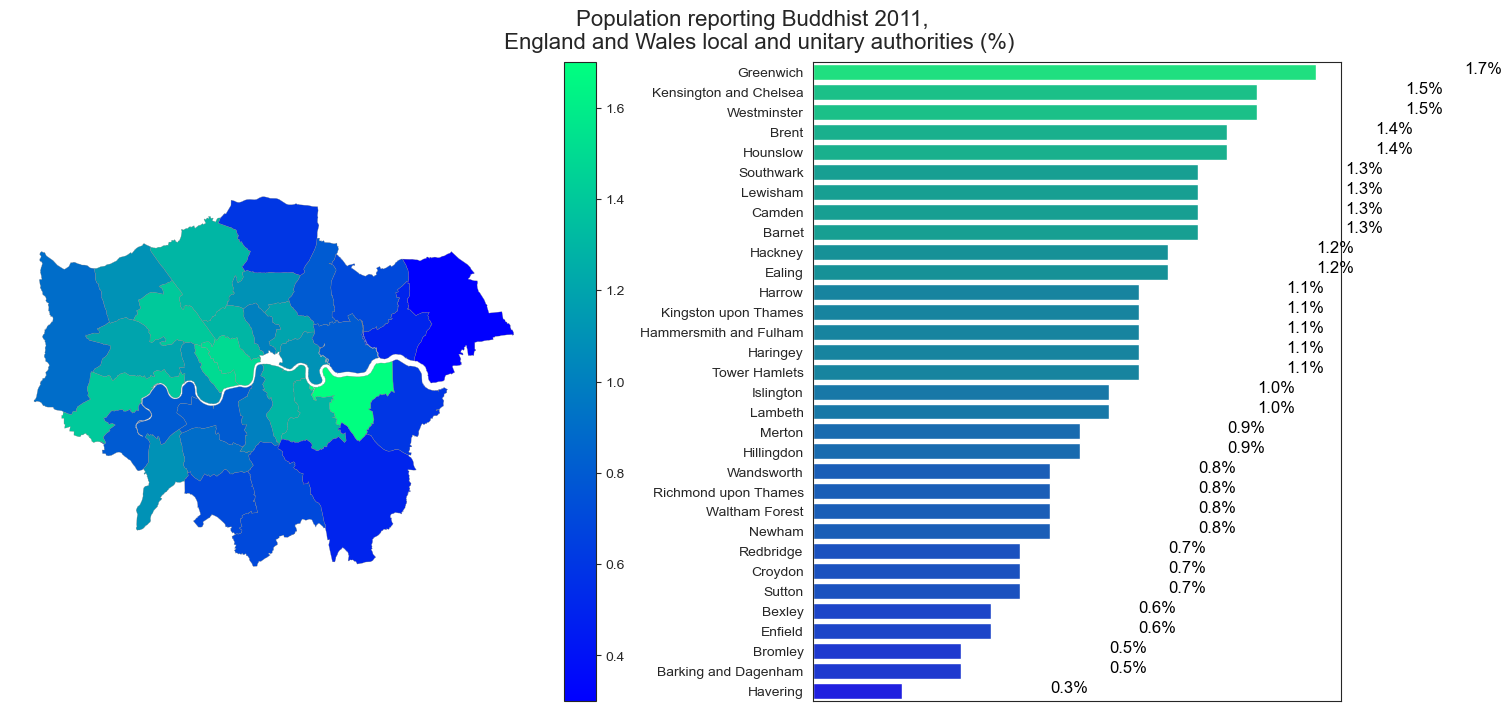

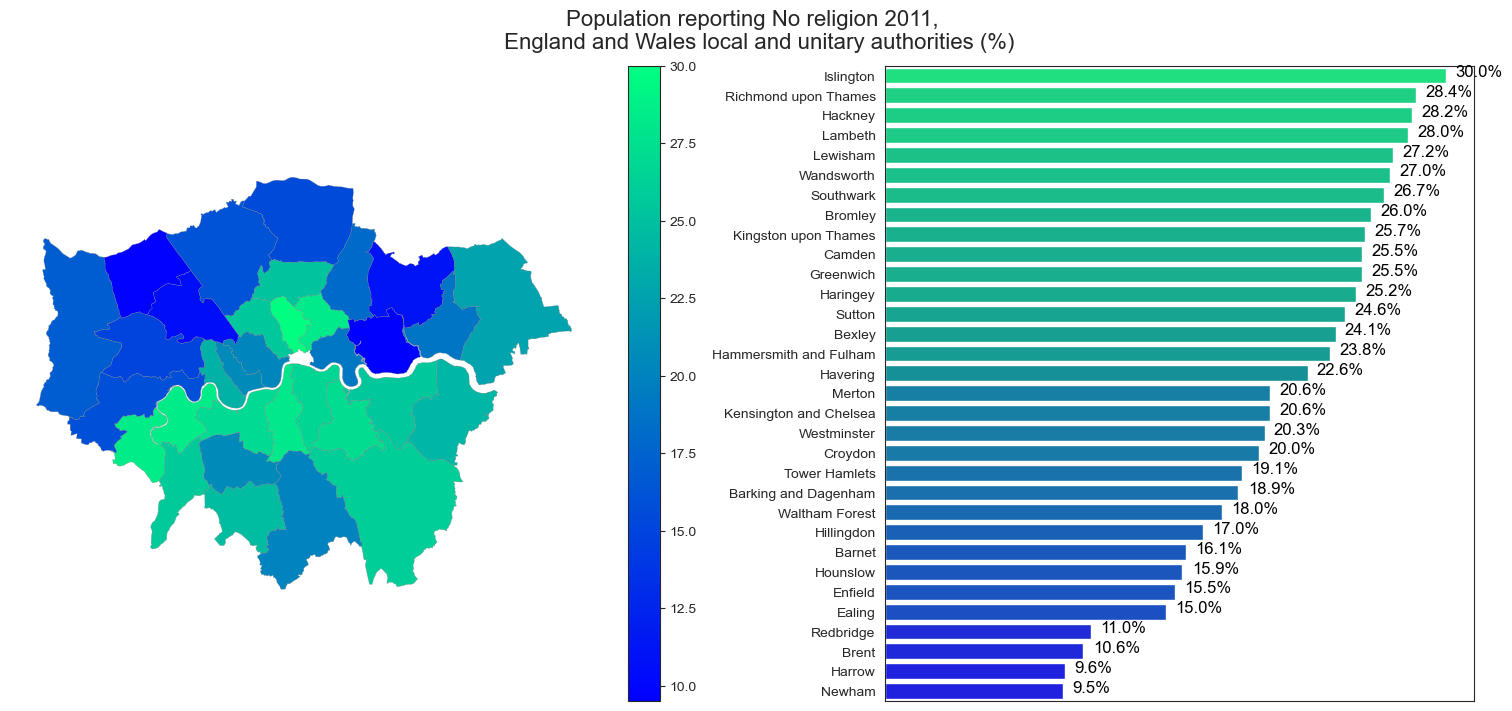

In [26]:
# List of subsets
subsets = ['Christian', 'Muslim', 'Hindu', 'Jewish', 'Sikh', 'Buddhist','No religion']

# Loop through subsets and create plots
for subset in subsets:
    subset_df = subset_religion_gdf(merged_gdf, subset)

    plot_nomis_data(
        geo_data=subset_df[subset_df['county_code'].isin(county_london)],
        cmap="winter",
        title=f"Population reporting {subset} 2011, \n England and Wales local and unitary authorities (%)",
        barchart="On"
    )
    